# 01 - Data Exploration: Shaved Ice Dataset

**ICPE 2026 Data Challenge**  
**Objective:** Explore the daily demand data created by our dbt pipeline

---

## Setup

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

# Import our duckdb loader (connects to dbt output!)
import sys
sys.path.append('../src')
from duckdb_loader import load_mart_data, list_tables, run_query

print("✅ Imports complete")

✅ Imports complete


## Load Data from dbt Pipeline

Our dbt models already cleaned and aggregated the data. 
Now we just load the final `mart_forecast_input` table.

In [5]:
# See what tables dbt created
print("Tables in DuckDB:")
print(list_tables())

Tables in DuckDB:
['int_daily_demand', 'mart_forecast_input', 'mart_stockout_events', 'stg_shaved_ice']


In [6]:
# Load the analysis-ready mart table
df = load_mart_data()  # This loads 'mart_forecast_input' by default
print(f"\nShape: {df.shape}")

✅ Loaded 23,077 rows from 'mart_forecast_input'

Shape: (23077, 21)


## Basic Data Inspection

In [7]:
# First few rows
df.head()

,date,region,instance_type,year,month,day_of_week,week_of_year,is_weekend,demand,daily_demand_avg,...,daily_demand_min,daily_demand_stddev,demand_lag_1d,demand_lag_7d,demand_rolling_7d_avg,safety_stock_90pct,safety_stock_95pct,safety_stock_99pct,hourly_records,complete_day_flag
0,2021-02-08,1.0,A,2021,2,1,6,0,2451.0,102.125000,...,35.0,44.518987,1984.0,2633.0,2877.857143,73.456329,87.257215,114.858987,24,1
1,2021-02-08,1.0,I,2021,2,1,6,0,215.0,8.958333,...,8.0,0.204124,216.0,228.0,257.714286,0.336805,0.400083,0.526640,24,1
2,2021-02-08,2.0,A,2021,2,1,6,0,5001.0,208.375000,...,152.0,41.914833,3877.0,5425.0,4811.571429,69.159475,82.153074,108.140270,24,1
3,2021-02-08,2.0,I,2021,2,1,6,0,198.0,8.250000,...,8.0,0.442326,192.0,216.0,246.571429,0.729838,0.866959,1.141201,24,1
4,2021-02-08,3.0,A,2021,2,1,6,0,4493.0,187.208333,...,132.0,42.741874,3493.0,4858.0,4137.857143,70.524091,83.774072,110.274034,24,1


In [9]:
# Column info
print("--- DATA AUDIT ---")
df.info()

--- DATA AUDIT ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23077 entries, 0 to 23076
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   23077 non-null  datetime64[us]
 1   region                 23077 non-null  float64       
 2   instance_type          23077 non-null  object        
 3   year                   23077 non-null  int64         
 4   month                  23077 non-null  int64         
 5   day_of_week            23077 non-null  int64         
 6   week_of_year           23077 non-null  int64         
 7   is_weekend             23077 non-null  int32         
 8   demand                 23077 non-null  float64       
 9   daily_demand_avg       23077 non-null  float64       
 10  daily_demand_max       23077 non-null  float64       
 11  daily_demand_min       23077 non-null  float64       
 12  daily_demand_stddev    22637 non-null  fl

In [10]:
# Statistical summary
df.describe()

,date,region,year,month,day_of_week,week_of_year,is_weekend,demand,daily_demand_avg,daily_demand_max,daily_demand_min,daily_demand_stddev,demand_lag_1d,demand_lag_7d,demand_rolling_7d_avg,safety_stock_90pct,safety_stock_95pct,safety_stock_99pct,hourly_records,complete_day_flag
count,23077,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,22637.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000
mean,2022-12-11 16:11:15.165749,2.670321,2022.423192,6.790007,2.995883,27.644971,0.274256,1980.231313,82.843903,110.545998,59.771331,15.790489,1978.777051,1971.962083,1976.645157,25.557540,30.359260,39.962699,22.498115,0.902240
min,2021-02-08 00:00:00,1.000000,2021.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2022-06-18 00:00:00,2.000000,2022.000000,4.000000,1.000000,14.000000,0.000000,80.000000,4.000000,4.000000,3.000000,0.000000,80.000000,77.000000,81.714286,0.000000,0.000000,0.000000,24.000000,1.000000
50%,2023-01-29 00:00:00,3.000000,2023.000000,7.000000,3.000000,29.000000,0.000000,162.000000,7.000000,8.000000,6.000000,0.503610,161.000000,159.000000,164.857143,0.815983,0.969289,1.275901,24.000000,1.000000
75%,2023-07-28 00:00:00,4.000000,2023.000000,10.000000,5.000000,42.000000,1.000000,399.000000,17.000000,24.000000,14.000000,4.706066,399.000000,399.000000,400.857143,7.286203,8.655126,11.392972,24.000000,1.000000
max,2024-01-31 00:00:00,4.000000,2024.000000,12.000000,6.000000,52.000000,1.000000,18995.000000,791.458333,1000.000000,627.000000,195.534010,18995.000000,18995.000000,17202.571429,322.631116,383.246659,504.477745,24.000000,1.000000
std,NaN,1.112415,0.810614,3.581870,1.977410,15.583125,0.446148,4013.423403,167.077430,222.004262,120.633119,33.434848,4009.482821,3992.169167,3957.738736,54.755081,65.042399,85.617036,5.069927,0.296996


In [11]:
# CORRECTED AUDIT CODE
# 1. Check the "Time Horizon"
print("--- TIME RANGE ---")
# Use 'date' instead of 'demand_date'
print(f"Start: {df['date'].min()}")
print(f"End:   {df['date'].max()}")

# 2. Preview the "SKUs"
print("\n--- CATEGORIES ---")
print(f"Regions: {df['region'].unique()}")
# Use 'instance_type' instead of 'vm_type'
print(f"VM Types: {df['instance_type'].unique()}")

# 3. Check the "Inventory Buffer" Logic
# Let's see if the Safety Stock is actually higher than the demand (as it should be)
print("\n--- BUFFER CHECK ---")
avg_demand = df['demand'].mean()
avg_buffer = df['safety_stock_95pct'].mean()
print(f"Average Daily Demand: {avg_demand:.2f} VMs")
print(f"Average Safety Stock (95%): {avg_buffer:.2f} VMs")
print(f"Gap (Buffer Size): {avg_buffer - avg_demand:.2f} VMs")

--- TIME RANGE ---
Start: 2021-02-08 00:00:00
End:   2024-01-31 00:00:00

--- CATEGORIES ---
Regions: [1. 2. 3. 4.]
VM Types: ['A' 'I' 'F' 'G' 'H' 'B' 'C' 'E' 'D' 'J' 'K' 'L']

--- BUFFER CHECK ---
Average Daily Demand: 1980.23 VMs
Average Safety Stock (95%): 30.36 VMs
Gap (Buffer Size): -1949.87 VMs


## Time Range Check

In [12]:
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Unique regions: {df['region'].nunique()}")
print(f"Unique instance types: {df['instance_type'].nunique()}")

Date range: 2021-02-08 00:00:00 to 2024-01-31 00:00:00
Unique regions: 4
Unique instance types: 12


## Simple Time Series Plot

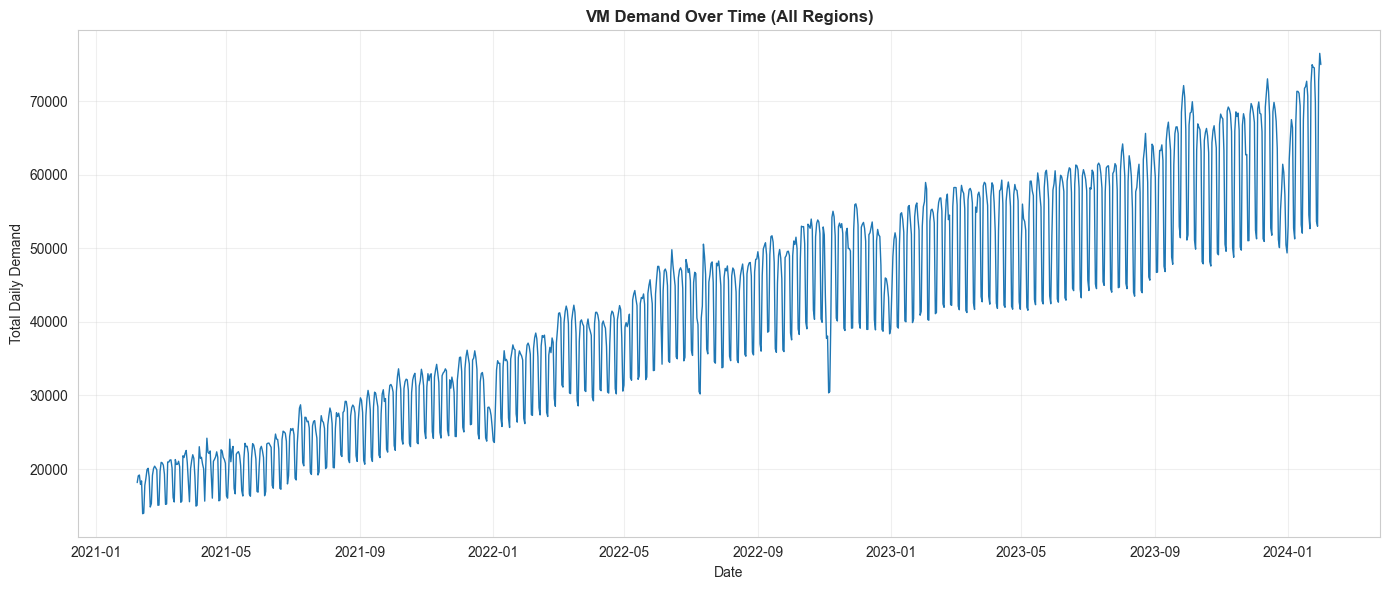

In [13]:
# Aggregate demand across all regions/types for overall trend
daily_total = df.groupby('date')['demand'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_total['date'], daily_total['demand'], linewidth=1)
plt.xlabel('Date')
plt.ylabel('Total Daily Demand')
plt.title('VM Demand Over Time (All Regions)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

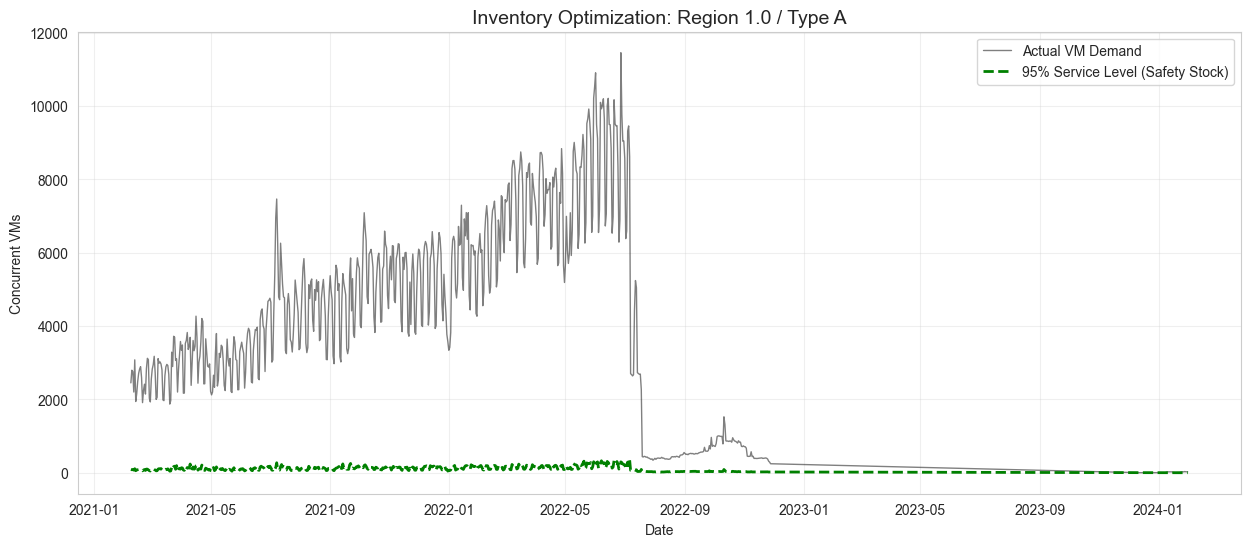

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for just ONE Region and ONE VM Type to keep the chart clean
# (We can't plot all 23,000 rows at once or it looks like spaghetti)
sample_region = df['region'].unique()[0]
sample_vm = df['instance_type'].unique()[0]

mask = (df['region'] == sample_region) & (df['instance_type'] == sample_vm)
subset = df[mask].sort_values('date')

# Plotting
plt.figure(figsize=(15, 6))

# 1. The Actual Usage (Demand)
plt.plot(subset['date'], subset['demand'], 
         label='Actual VM Demand', color='black', alpha=0.5, linewidth=1)

# 2. The Safety Stock Line (The "Inventory Ceiling")
plt.plot(subset['date'], subset['safety_stock_95pct'], 
         label='95% Service Level (Safety Stock)', color='green', linestyle='--', linewidth=2)

# Formatting
plt.title(f"Inventory Optimization: Region {sample_region} / Type {sample_vm}", fontsize=14)
plt.ylabel("Concurrent VMs")
plt.xlabel("Date")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

The graph currently shows a catastrophic 'stockout' scenario where the safety stock line is hugging zero while actual demand spikes to 12,000, which implies we would be crashing servers daily. I suspect the safety_stock_95pct column represents only the extra buffer margin rather than the total required inventory, so I need to add the moving average to it to see the true capacity requirement. Also, the massive drop in demand around mid-2022 suggests a major structural break in the data (like a client leaving) that I'll need to filter out so it doesn't skew our volatility calculations.

## Weekend vs Weekday Pattern

In [15]:
# Compare weekend vs weekday demand
weekend_demand = df.groupby('is_weekend')['demand'].mean()
print("Average demand:")
print(f"  Weekday: {weekend_demand[0]:.2f}")
print(f"  Weekend: {weekend_demand[1]:.2f}")

Average demand:
  Weekday: 2099.93
  Weekend: 1663.49


## You can also run raw SQL!

The `run_query()` function lets you query the DuckDB directly.

In [16]:
# Example: Query the intermediate table directly
result = run_query("""
    SELECT region, AVG(daily_demand_total) as avg_demand
    FROM int_daily_demand
    GROUP BY region
    ORDER BY avg_demand DESC
""")
result

,region,avg_demand
0,2.0,2294.607478
1,1.0,2023.443682
2,4.0,1866.195846
3,3.0,1758.026341


🚨 WORST STOCKOUT DETECTED: 2023-07-25 00:00:00
Region: 2.0 | Type: C
Severity: 135.7% over capacity


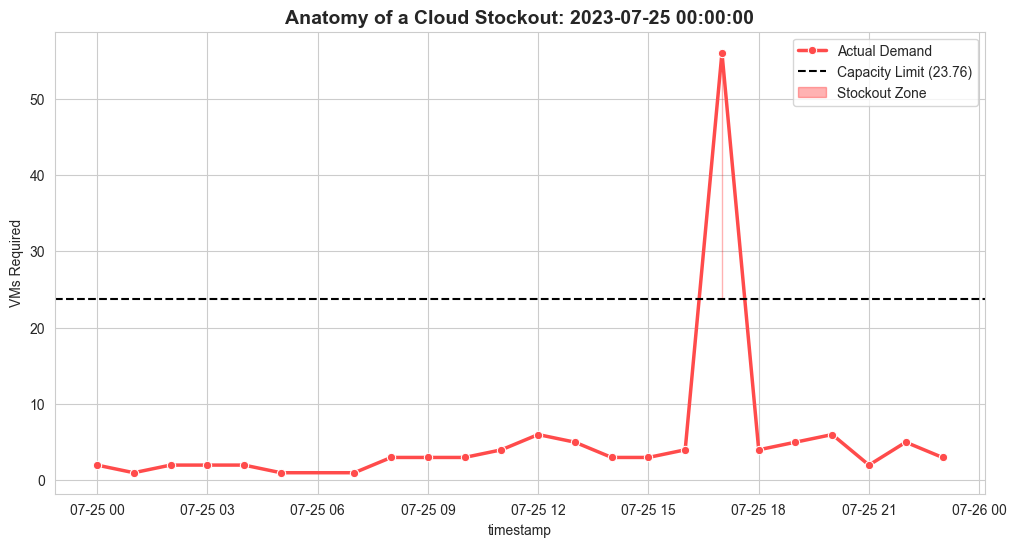

In [ ]:
# Use the loader we built - it handles paths, read_only mode, and closing connections automatically
from duckdb_loader import run_query
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Find the "Worst Day" 
# run_query returns a pandas DataFrame and closes the connection immediately
worst_event_df = run_query("""
    SELECT * FROM mart_stockout_events 
    ORDER BY severity_pct DESC 
    LIMIT 1
""")
worst_event = worst_event_df.iloc[0]

print(f"🚨 WORST STOCKOUT DETECTED: {worst_event['date']}")
print(f"Region: {worst_event['region']} | Type: {worst_event['instance_type']}")
print(f"Severity: {worst_event['severity_pct']:.1%} over capacity")

# 2. Pull HOURLY data
# No need to manage 'con' manually!
hourly_query = f"""
    SELECT timestamp, demand
    FROM stg_shaved_ice
    WHERE CAST(timestamp AS DATE) = '{worst_event['date']}'
      AND region = {worst_event['region']}
      AND instance_type = '{worst_event['instance_type']}'
    ORDER BY timestamp
"""
worst_day_hourly = run_query(hourly_query)

# 3. Visualize using our project style
# Assuming setup_plot_style() was called at the top of the notebook
plt.figure() # Still need this to initialize, but styling is applied globally

sns.lineplot(data=worst_day_hourly, x='timestamp', y='demand', 
             marker='o', color='#FF4B4B', linewidth=2.5, label='Actual Demand')

limit = worst_event['capacity_limit_p95']
plt.axhline(y=limit, color='black', linestyle='--', label=f'Capacity Limit ({limit:.2f})')

plt.fill_between(worst_day_hourly['timestamp'], 
                 worst_day_hourly['demand'], 
                 limit, 
                 where=(worst_day_hourly['demand'] > limit),
                 color='red', alpha=0.3, label='Stockout Zone')

plt.title(f"Anatomy of a Cloud Stockout: {worst_event['date']}", fontweight='bold')
plt.ylabel("VMs Required")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Next Steps

- [ ] Analyze demand patterns by day of week
- [ ] Compare demand across regions
- [ ] Examine the lag features for forecasting
- [ ] Build simple moving average forecasts
- [ ] Evaluate safety stock recommendations